# Flower Recognition

In this project, the flower data set originated from https://www.kaggle.com/alxmamaev/flowers-recognition be used to classify the type of flowers. There are three types of flowers in this project, namely, rose, sunflower, and tulip. The images of flowers will be fed into a convolutional neural network. The outcomes will be the type of flowers.

In [1]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/BuegPhysics/Desktop/Machine Learning/Flower


## Building the convolutional neural network

### Importing the Keras libraries and packages

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### Initialising the CNN

In [3]:
classifier = Sequential()

### 1st Layer - 1st Convolutional Layer

This is a convolutional layer with 32 feature detectors of size three by three. The input size of the image will be resize to width of 64 and hight of 64with RGB color. After applying feature detectors, the batch normalization will be applied to the ouput and the LeakyReLU activation function will be applied to increase the non-linearity to the feature maps.

In [4]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3)))
classifier.add(BatchNormalization())
classifier.add(LeakyReLU(alpha=0.2))

Instructions for updating:
Colocations handled automatically by placer.


### 2nd Layer - 1st Max Pooling Layer

The max pooling of size two by two will be applied in this layer.

In [5]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### 3rd Layer - 2nd Convolutional Layer

This is another convolutional layer with 32 feature detectors of size three by three.

In [6]:
classifier.add(Conv2D(32, (3, 3)))
classifier.add(BatchNormalization())
classifier.add(LeakyReLU(alpha=0.2))

### 4th Layer - 2nd Max Pooling Layer

In [7]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### 5th Layer - 3nd Convolutional Layer

In [8]:
classifier.add(Conv2D(32, (3, 3)))
classifier.add(BatchNormalization())
classifier.add(LeakyReLU(alpha=0.2))

### 6th Layer - 3nd Max Pooling Layer

In [9]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### 7th Layer - Flatten Layer

In this layer, the feature maps will be transformed into a long vector.

In [10]:
classifier.add(Flatten())

### 8th Layer - 1st Fully Connected Layer

The vector from the flatten layer will be fed into the artificial neuron network.

In [11]:
classifier.add(Dense(units = 64))
classifier.add(LeakyReLU(alpha=0.2))
classifier.add(Dropout(rate = 0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### The Last Layer - Output Layer

This is the output layer. There are three outcome, depending on types of rice leaf diseases. The activation function is this case will be softmax function.

In [12]:
classifier.add(Dense(units = 3, activation = 'softmax'))

### Compliing the CNN

The loss function is the cross entropy.

In [13]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Architecture of The CNN

In [23]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 29, 29, 32)        0         
__________

## Fitting the CNN to the image

In total, there are 1974 images for the training set. Therefore, we would like to generate images from the existing image to help increasing the total number of training set.

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1974 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 528 images belonging to 3 classes.


### Importing the Model from the Save File

In [24]:
from keras.models import load_model
classifier = load_model('Flower_Recognition.h5')

### Train the model

In [25]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 1974,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 528)

Epoch 1/1
1974/1974 [==============================] - 526s 266ms/step - loss: 0.1087 - acc: 0.9592 - val_loss: 1.4595 - val_acc: 0.7164


In [26]:
classifier.save('Flower_Recognition.h5')

## Testing On Sample Images

There are six images of flowers in the 'dataset/example'.

In [31]:
from IPython.display import Image

In [54]:
example_datagen = ImageDataGenerator(rescale=1./255)
example_set = example_datagen.flow_from_directory('dataset/example/',
                                            target_size = (64, 64))

Found 6 images belonging to 1 classes.


In [81]:
Image_prediction = classifier.predict_generator(example_set, steps=1)

In [82]:
Image_prediction

array([[8.13375413e-01, 1.13077547e-07, 1.86624512e-01],
       [1.00200755e-17, 1.00000000e+00, 1.85820003e-18],
       [2.63735396e-03, 1.34134525e-02, 9.83949244e-01],
       [2.32095548e-17, 1.00000000e+00, 3.00161689e-16],
       [9.56052661e-01, 1.11912321e-02, 3.27560790e-02],
       [4.94924222e-07, 4.62125263e-06, 9.99994874e-01]], dtype=float32)

### Making Dictionary to Transform the Max Probability to Types of Flowers

In [65]:
prob2classes ={0:'rose', 1:'sunflower', 2:'tulip'}

### Unknown 1

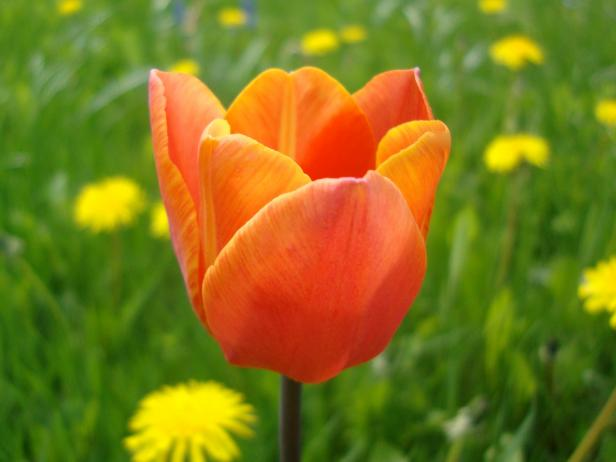

In [69]:
Image(filename='dataset/example/unknown/pic1.jpeg')

In [83]:
prob2classes[Image_prediction[0].argmax()]

'rose'

The result is a tulip. The model predicts the wrong answer.

### Unknown 2

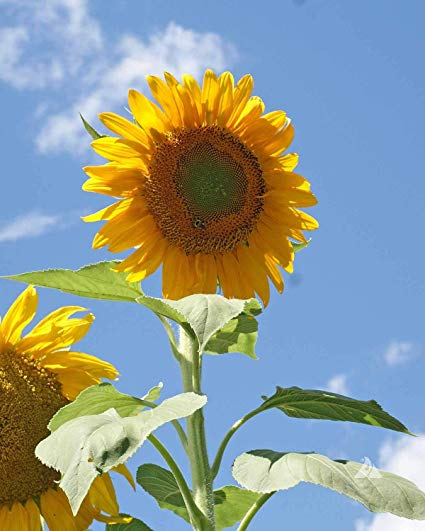

In [71]:
Image(filename='dataset/example/unknown/pic2.jpeg')

In [84]:
prob2classes[Image_prediction[1].argmax()]

'sunflower'

This time the model predict the right answer.

### Unknown 3

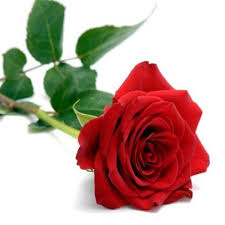

In [73]:
Image(filename='dataset/example/unknown/pic3.jpeg')

In [86]:
prob2classes[Image_prediction[2].argmax()]

'tulip'

In [ ]:
The model predicts the wrong flower.

### Unknown 4

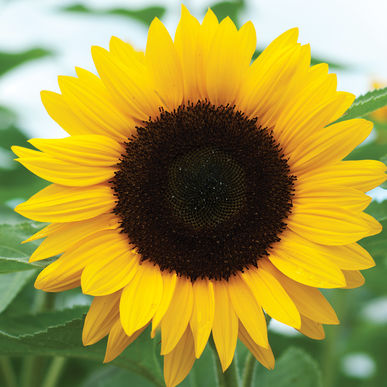

In [87]:
Image(filename='dataset/example/unknown/pic4.jpeg')

In [88]:
prob2classes[Image_prediction[3].argmax()]

'sunflower'

The model predicts the right answer.

### Unknown 5

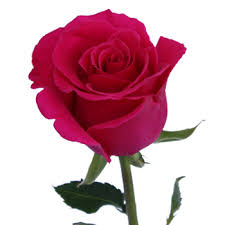

In [89]:
Image(filename='dataset/example/unknown/pic5.jpeg')

In [90]:
prob2classes[Image_prediction[4].argmax()]

'rose'

The model predicts the right answer.

### Unknown 6

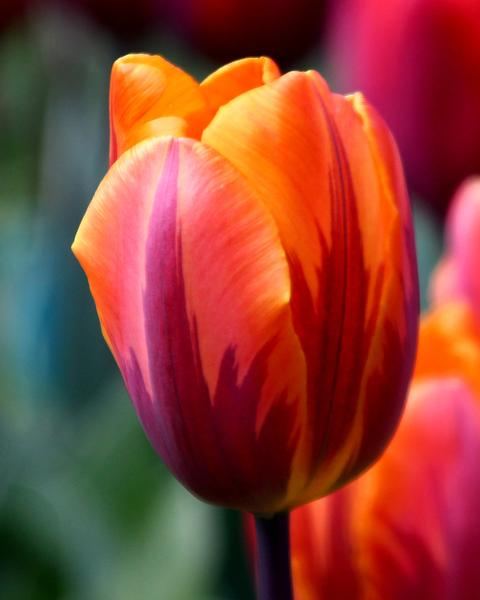

In [91]:
Image(filename='dataset/example/unknown/pic6.jpeg')

In [92]:
prob2classes[Image_prediction[5].argmax()]

'tulip'

The model predicts the right answer.